<a href="https://colab.research.google.com/github/bing020815/Computer-Vision/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python 3 
import cv2
import sys
from matplotlib import pyplot as plt
import numpy as np
import sys
import os.path

https://www.thepythoncode.com/article/detect-faces-opencv-python

### Detect faces from url

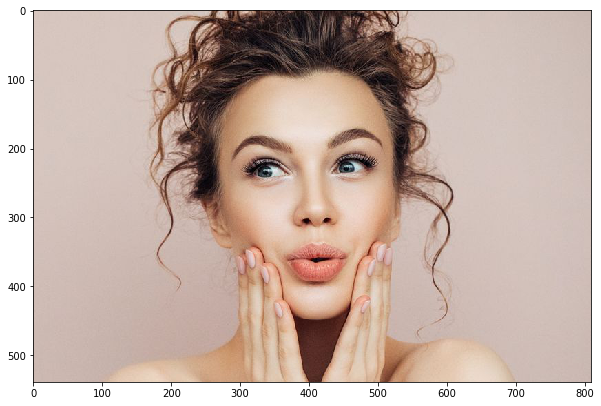

In [0]:
from urllib.request import urlopen
from PIL import Image
url = 'https://i2-prod.mirror.co.uk/incoming/article14334083.ece/ALTERNATES/s810/3_Beautiful-girl-with-a-gentle-smile.jpg'
img = Image.open(urlopen(url))
image=np.ascontiguousarray(img)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

Before we detect faces in the image, we will first need to convert the image to grayscale, that is because the function we gonna use to detect faces expects a grayscale image.  

The function cvtColor() converts an input image from one color space to another, we specified cv2.COLOR_BGR2GRAY code, which means converting from BGR ( **B**lue **G**reen **R**ed ) to grayscale

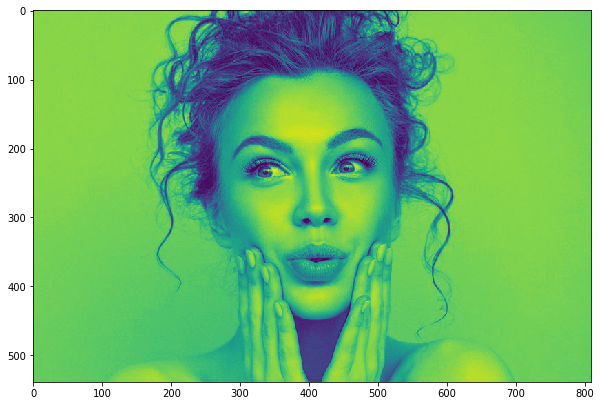

In [0]:
# converting to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,8))
plt.imshow(gray)# Initialize the face recognizer (default face haar cascade)

haar cascade is for human face detection. It is a pre-trained classifier stored in xml.
https://github.com/opencv/opencv/tree/master/data/haarcascades

In [0]:
# Initialize the face recognizer (default face haar cascade)
faceCascade = cv2.CascadeClassifier(os.path.join(cv2.haarcascades, 'haarcascade_frontalface_default.xml'))

In [0]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=4,
    minSize=(30, 30)
)

print("Found {0} faces in the image!".format(len(faces)))

Found 1 faces in the image!


detectMultiScale() function takes an image as parameter and detects objects of different sizes as a list of rectangles

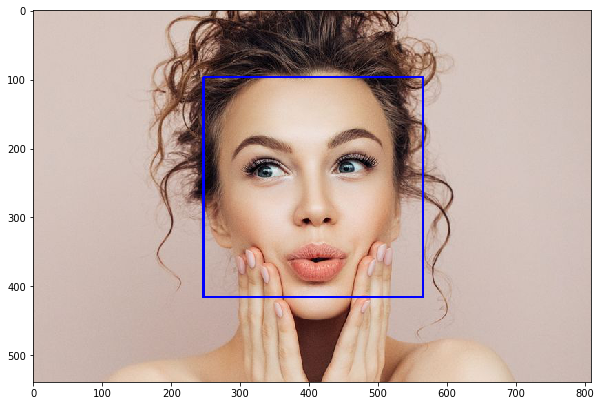

In [0]:
# for every face, draw a blue rectangle
for x, y, width, height in faces:
    cv2.rectangle(image, (x, y), (x + width, y + height), 
                  color=(0, 0, 255), thickness=2)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [0]:
# save the image with rectangles
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite("from_url_face_detected.jpg", image)

True

### Detect faces from local machine

opencv reads and displays an image as BGR format instead of RGB color format
matplotlib uses RGB color format to display imgae. 
Without transforming the color format from BGR to RGB, it will display image 
with blue color.

There are two way to solve the issue:
1. use "cv2.cvtColor(image, cv2.COLOR_BGR2RGB)" to convert the color format to industry standard

2. uses slicing method, "[: , : , : : -1]", to replace the position of B and R

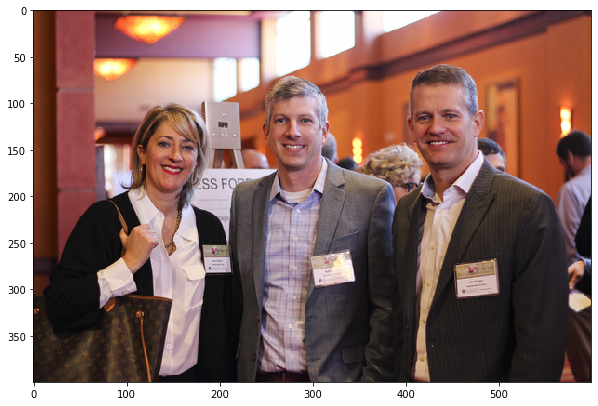

In [0]:
%%script false 

# GET IMAGES
imagePath = ('Images/sams.jpg')
# xml path ofr haar cascade classifier features
cascPath = "haarcascade_frontalface_default.xml"

# read image with reverse position on color channels
image = cv2.imread(imagePath)[:,:,::-1]
# for solving the unclean array issue with cv2.rectangle() 
image=np.ascontiguousarray(image)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

The function imread() loads an image from the specified file and returns it as a numpy N-dimensional array.  

Before we detect faces in the image, we will first need to convert the image to grayscale, that is because the function we gonna use to detect faces expects a grayscale image.  

In [0]:
# converting to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The function cvtColor() converts an input image from one color space to another, we specified cv2.COLOR_BGR2GRAY code, which means converting from BGR ( **B**lue **G**reen **R**ed ) to grayscale.

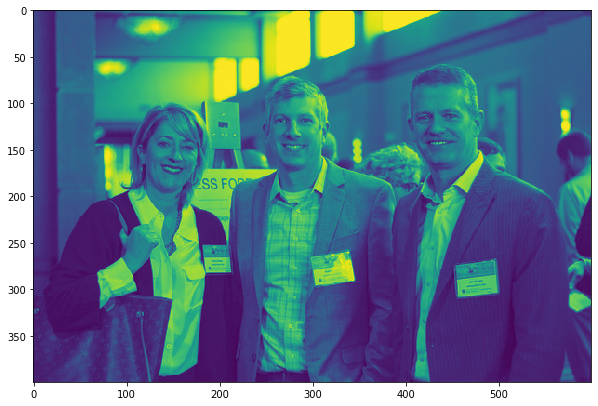

In [0]:
plt.figure(figsize=(10,8))
plt.imshow(gray)

In [0]:
# Initialize the face recognizer (default face haar cascade)
faceCascade = cv2.CascadeClassifier(os.path.join(cv2.haarcascades, 'haarcascade_frontalface_default.xml'))

In [0]:
faceCascade

<CascadeClassifier 00000260516B7EF0>

haar cascade is for human face detection. It is a pre-trained classifier stored in xml.  
https://github.com/opencv/opencv/tree/master/data/haarcascades

In [0]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=4,
    minSize=(30, 30)
)

print("Found {0} faces in the image!".format(len(faces)))


Found 3 faces in the image!


detectMultiScale() function takes an image as parameter and detects objects of different sizes as a list of rectangles, let's draw these rectangles in the image:

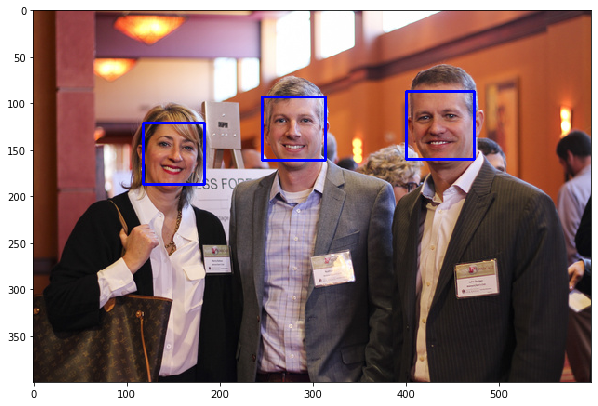

In [0]:
# for every face, draw a blue rectangle
for x, y, width, height in faces:
    cv2.rectangle(image, (x, y), (x + width, y + height), 
                  color=(0, 0, 255), thickness=2)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [0]:
# save the image with rectangles
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite("from_local_face_detected.jpg", image)

True